In [1]:

import random
import matplotlib.pyplot as plt
import timeit
RELEASE = 1
DEBUG = 0
def generate_maze_recursive_backtracking(aX_size, aY_size):
    aWalls = [[[1,1,1,1] for _ in range(aX_size)] for _ in range(aY_size)]
    aVisited_nodes = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    path = [(0,0)]
    aVisited_nodes[0][0] = True

    while path:
        x, y = path[-1]
        possible_directions = []
        if x > 0 and not aVisited_nodes[y][x-1]:
            possible_directions.append((-1, 0, 0, 2))
        if x < aX_size-1 and not aVisited_nodes[y][x+1]:
            possible_directions.append((1, 0, 2, 0))
        if y > 0 and not aVisited_nodes[y-1][x]:
            possible_directions.append((0, -1, 1, 3))   
        if y < aY_size-1 and not aVisited_nodes[y+1][x]:
            possible_directions.append((0, 1, 3, 1))    

        if possible_directions:
            dx, dy, w1, w2 = random.choice(possible_directions)
            nx, ny = x+dx, y+dy
            aWalls[y][x][w1] = 0
            aWalls[ny][nx][w2] = 0
            aVisited_nodes[ny][nx] = True
            path.append((nx, ny))
        else:
            path.pop()
    return aWalls


def draw_maze(aWalls): #pridat aState, zda je maze empty, ci nikoliv. Pokud ne, kreslit i uzly, projite a cestu!
    fig, ax = plt.subplots() 
    aY_size = len(aWalls[0])
    aX_size = len(aWalls)
    for y in range(aY_size):
        for x in range(aX_size):
            left, top, right, bottom = aWalls[y][x]
            x0, x1 = x, x+1
            y0, y1 = aY_size - y, aY_size - (y+1)

            if top: ax.plot([x0, x1], [y0, y0], color="black")
            if right: ax.plot([x1, x1], [y0, y1], color="black")
            if bottom: ax.plot([x0, x1], [y1, y1], color="black")
            if left: ax.plot([x0, x0], [y0, y1], color="black")
    ax.set_aspect("equal")
    ax.axis("off")
    plt.title("Prázdné bludiště generované metodou rekurzivního backtrackingu (DFS)")
    #scatter - pridani bodu
    ax.scatter(0.5,aY_size - 0.5, color = 'hotpink')
    ax.scatter(aX_size - 0.5, 0.5, color = 'green')
    plt.show()


                       


In [2]:
def test1_generating_drawing_maze_recur_backtracking_60x60(aTesting_phase):
    
    if aTesting_phase == DEBUG:
        print("Test1 - recursive backtracking maze generating algorithm testing start...\n")
        time_begin = timeit.default_timer()
    aWalls = generate_maze_recursive_backtracking(60, 60)
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
        print(f"Maze successfully generated! {round(delta_t * 1e3, 2)} ms elapsed")
        if aWalls == []:
            print("3D array of walls is empty!")
            assert False
        elif len(aWalls[0]) != 60: #x-ova osa!!!
            print("Bad X-axis length!")
            assert False
        elif len(aWalls) != 60: #y-ova osa!!!
            print("Bad Y-axis length!")
            assert False
        else:
            print("Top edge of maze testing...\n")
        for x in range(60):
            top_idx = 1
            if aWalls[0][x][top_idx] == 0:
                print("Failed to generated maze - top edge is missing!")
                assert False
        print("Left edge of maze testing...\n")
        
        for y in range(60):
            left_idx = 0
            if aWalls[y][0][left_idx] == 0:
                print("Failed to generated maze - left edge is missing!")
                assert False

        print("Right edge of maze testing...\n")
        for y in range(60):
            right_idx = 2
            if aWalls[y][60-1][right_idx] == 0:
                print("Failed to generated maze - right edge is missing!")
                assert False
        print("Bottom edge of maze testing...\n")
        for x in range(60):
            bottom_idx = 1
            if aWalls[0][x][bottom_idx] == 0:
                print("Failed to generated maze - bottom edge is missing!")
                assert False
    if aTesting_phase == DEBUG:
        print(f"Maze drawing algorithm start...")
        time_begin = timeit.default_timer()
    draw_maze(aWalls)
    
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
    #   otestovat body startu a cile, steny okolo.
    #   otestovat, zda je to opravdu 60 x 60
    #   u kresleni prozkoumat, zda je skutecne podle prvni bunky generovano to, co chceme a ne zrcadlove!
        print(f"Maze drawing algorithm done! {round(delta_t , 2)} s elapsed\nEnd of the Test1")
    return aWalls


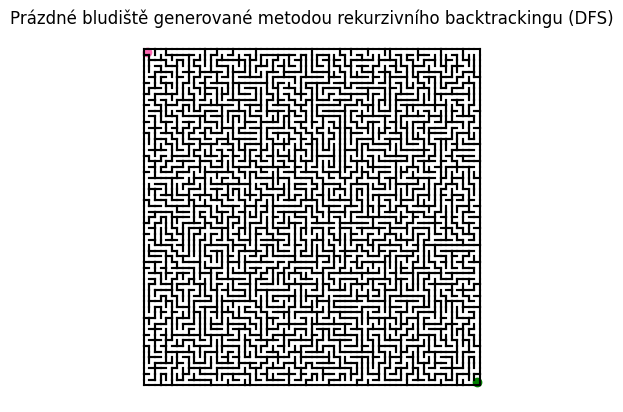

[(0, 1), (1, 1), (1, 2), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 6), (4, 6), (4, 7), (5, 7), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (9, 5), (9, 4), (8, 4), (8, 3), (8, 2), (9, 2), (9, 3), (10, 3), (11, 3), (12, 3), (12, 4), (12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 6), (16, 6), (17, 6), (17, 7), (18, 7), (18, 6), (18, 5), (17, 5), (16, 5), (16, 4), (15, 4), (15, 3), (15, 2), (14, 2), (14, 3), (13, 3), (13, 2), (12, 2), (11, 2), (11, 1), (11, 0), (12, 0), (12, 1), (13, 1), (13, 0), (14, 0), (14, 1), (15, 1), (16, 1), (17, 1), (17, 0), (18, 0), (18, 1), (19, 1), (19, 2), (18, 2), (18, 3), (18, 4), (19, 4), (19, 3), (20, 3), (20, 2), (21, 2), (22, 2), (22, 3), (22, 4), (22, 5), (21, 5), (21, 6), (21, 7), (20, 7), (20, 8), (20, 9), (19, 9), (19, 8), (18, 8), (17, 8), (17, 9), (16, 9), (16, 8), (16, 7), (15, 7), (14, 7), (14, 8), (13, 8), (13, 9), (12, 9), (12, 8), (12, 7), (12, 6), (11, 6), (11, 5), (10, 5), (10, 6), (9,

In [3]:
def maze_bfs_search(aWalls, aStart, aGoal):
    from collections import deque
    aX_size = len(aWalls[0]) #aWalls je pole [y][x]
    aY_size = len(aWalls)
    aNodes_visited = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    aNodes_visited[aStart[0]][aStart[1]] = True
    aParents = {} #záznam, odkud jsi přišel
    direction_vectors = [(0,-1), (-1, 0), (0, 1), (1, 0)] #list tuplů - nesmi se po vytvoreni jiz menit!
    #fronta
    aQueue = deque([aStart])
    while aQueue:
        (aY, aX) = aQueue.popleft()
        if (aY, aX) == aGoal:
            aBFS_path = []
            while (aY, aX) != aStart:
                aBFS_path.append((aY, aX))
                (aY, aX) = aParents[(aY, aX)] #podivej se, odkud jsi prisel
            return aBFS_path[::-1], aNodes_visited
           
        
        for i, (dy, dx) in enumerate(direction_vectors):
            if direction_vectors != [(0,-1), (-1, 0), (0, 1), (1, 0)]:
                print("Directions vectors (y, x) does not make any sense - list of tupples not matching [(0,-1), (-1, 0), (0, 1), (1, 0)]!")
                assert False #pokud nekdo zadal zvenku zadal nesmysl
            if aWalls[aY][aX][i] == 0:
                    newY, newX  = aY + dy, aX + dx
                    if not aNodes_visited[newY][newX]:
                        aNodes_visited[newY][newX] = True
                        aParents[(newY, newX)] = (aY, aX)
                        aQueue.append((newY, newX))
    print("Given maze can not be solved!")
    assert False
#def draw_path(aPath):
    
def main():
    myWalls = test1_generating_drawing_maze_recur_backtracking_60x60(RELEASE)
    myPath, myNodes_visited = maze_bfs_search(myWalls, (0,0), (30,30))
    print(myPath)
if __name__ == "__main__":
    main()


